# 填充每个节点的下一个右侧节点指针

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/populating-next-right-pointers-in-each-node/**

## 一、题目

给定一个完美二叉树，其所有叶子节点都在同一层，每个父节点都有两个子节点。二叉树定义如下：

```
struct Node {
  int val;
  Node *left;
  Node *right;
  Node *next;
}
```

填充它的每个 next 指针，让这个指针指向其下一个右侧节点。如果找不到下一个右侧节点，则将 next 指针设置为 NULL。

初始状态下，所有 next 指针都被设置为 NULL。

### 提示：

- 树中节点的数量在 [0, 2^12 - 1] 范围内
- -1000 <= node.val <= 1000

### 进阶：

- 你只能使用常量级额外空间。
- 使用递归解题也符合要求，本题中递归程序占用的栈空间不算做额外的空间复杂度。

## 二、示例

### 示例 1：


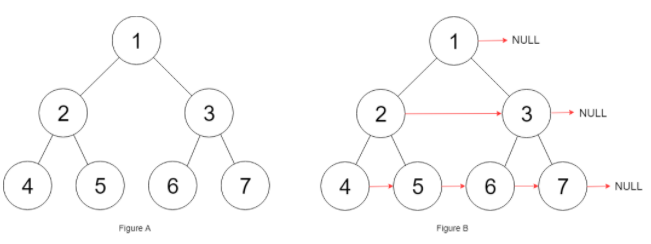

输入：root = [1,2,3,4,5,6,7]

输出：[1,#,2,3,#,4,5,6,7,#]

解释：给定二叉树如图 A 所示，你的函数应该填充它的每个 next 指针，以指向其下一个右侧节点，如图 B 所示。序列化的输出按层序遍历排列，同一层节点由 next 指针连接，'#' 标志着每一层的结束。

### 示例 2:

输入：root = []

输出：[]

## 三、解题思路

### 一、层序遍历

In [1]:
def connect(root: 'Node') -> 'Node':
    if not root:
        return root
    queue = [root]
    while queue:
        cur_layer = queue
        queue = []
        for i in range(len(cur_layer)):
            node = cur_layer[i]
            if i < len(cur_layer) - 1:
                node.next = cur_layer[i+1]
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
    return root

### 二、利用已有指针

In [1]:
def connect(root: 'Node') -> 'Node':
    if not root:
        return root
    leftmost = root
    while leftmost.left:
        head = leftmost
        while head:
            head.left.next = head.right
            if head.next:
                head.right.next = head.next.left
            head = head.next
        leftmost = leftmost.left
    return root 